## Getting the pretrained Word Embedding Model

In [ ]:
! wget -c "https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz"
! gunzip GoogleNews-vectors-negative300.bin.gz

In [ ]:
import gensim
model = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)

## Getting top 5 similar words for our list

In [ ]:
keys = ['London', 'Python', 'Shakesphere', 'Monday', 'Twitter', 'android']

embedding_clusters = []
word_clusters = []
for word in keys:
    embeddings = []
    words = []
    for similar_word, _ in model.most_similar(word, topn=5):
        words.append(similar_word)
        embeddings.append(model[similar_word])
    embedding_clusters.append(embeddings)
    word_clusters.append(words)

In [ ]:
embedding_clusters.shape

(6, 5, 300)

## Lets visualize using TSNE

In [ ]:
from sklearn.manifold import TSNE
import numpy as np

embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape
tsne_model_en_2d = TSNE(perplexity=5, n_components=2, init='pca', n_iter=3500, random_state=32)
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)

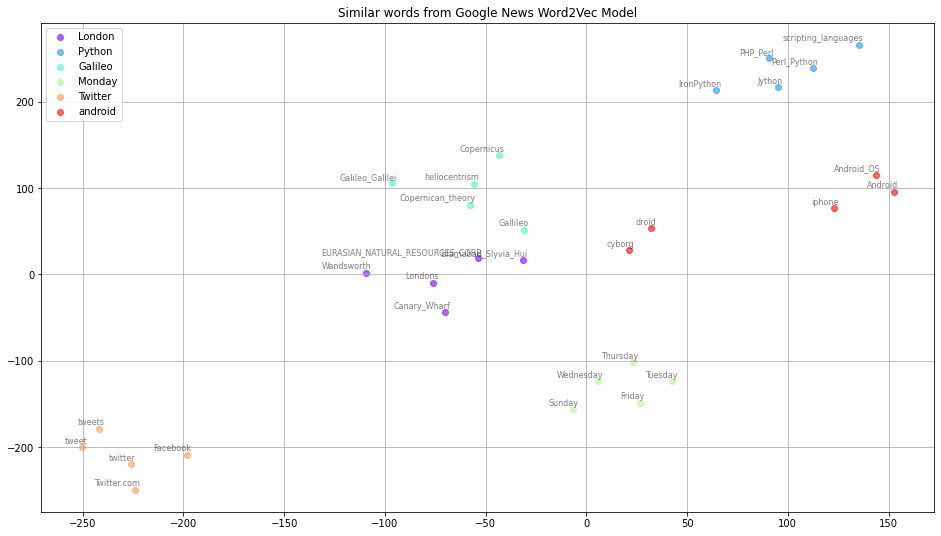

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as colormap
% matplotlib inline

plt.figure(figsize=(16, 9))
colors = colormap.rainbow(np.linspace(0, 1, len(keys)))
for label, embeddings, words, color in zip(keys, embeddings_en_2d, word_clusters, colors):
    x = embeddings[:, 0]
    y = embeddings[:, 1]
    plt.scatter(x, y, color=color, alpha=0.6, label=label)
    for i, word in enumerate(words):
        plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2),
                        textcoords='offset points', ha='right', va='bottom', size=8)
plt.legend()
plt.title('Similar words from Google News Word2Vec Model')
plt.grid(True)
plt.show()
